<a href="https://colab.research.google.com/github/KevinW824/CSE-144-Applied-Machine-Learning/blob/main/Summer_21_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

# Assignment 2

**DUE: Sunday July 4 at 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [2]:
NAME = "Bowen Wang"
STUDENT_ID = "bwang93"

## Problem 1 - Yield Dataset with Polynomial Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

This data set of size n = 15 contains measurements of yield from an experiment done at five different temperature levels. The variables are y = yield and x = temperature in degrees Fahrenheit. Download the data from PyDrive.

In [4]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [5]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
downloaded = drive.CreateFile({'id':"1snU4nKrW72fgaEYzWvnrK0iRhsVX2W7N"})
downloaded.GetContentFile('yield.csv')  

In [7]:
# Create pandas dataframe
data = pd.read_csv('yield.csv')

In [8]:
# Let's look at the data
data

,Temp,Yield
0,50,3.3
1,50,2.8
2,50,2.9
3,70,2.3
4,70,2.6
5,70,2.1
6,80,2.5
7,80,2.9
8,80,2.4
9,90,3.0


In [9]:
# Look at data description
data.describe()

,Temp,Yield
count,15.000000,15.000000
mean,78.000000,2.833333
std,17.808505,0.395811
min,50.000000,2.100000
25%,70.000000,2.550000
50%,80.000000,2.900000
75%,90.000000,3.050000
max,100.000000,3.500000


In [10]:
# Split data in X and y using pandas functionality.
X = data.iloc[:,0] # Create vector of explanatory variables
y = data.iloc[:,1] # Create vector of target variables

#cast dataframes into numpy arrays
X = X.values
y = y.values


# Split data into X_train, Y_train, X_test y_test using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# Reshape X_train, X_test for sklearn LinearRegression
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

### a) Linear Regression (10 points)

We will run a simple linear regression on this well curated dataset using sklearn's **LinearRegression**.

Hint: Review the sklearn docs https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html and class exercise.

In [11]:
from sklearn.linear_model import LinearRegression
# instantiate LinearRegression
regressor = LinearRegression()### YOUR CODE HERE ### 

# Fit the regressor using X_train and y_train
### YOUR CODE HERE ###
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's now visually inspect the model and see how well this model predicts the yield. First, we will plot the yield vs temp. points from training set in black. Then, we will plot the regression line in red. Predictions from the regression model lie along the red line.

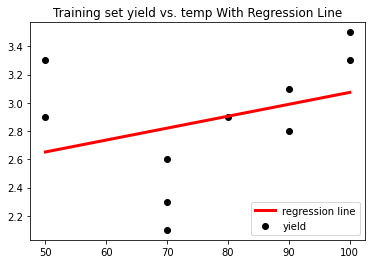

In [12]:
#Plot the actual yield (y_train) vs temp. values from training set
plt.scatter(X_train, y_train,  color='black', label = "yield")

# Plot the regression line
x = np.linspace(50, 100,15) # Generate 15 points to plot our regression line
x = x.reshape(-1,1) # reshape data for our regression
y = regressor.predict(x) # feed x's into regressor
plt.plot(x, y, color='red', linewidth=3, label = "regression line") # plot the regression line

plt.legend(loc='lower right')
plt.title('Training set yield vs. temp With Regression Line')
plt.show()

Let's also visually inspect the prediction results from the test set.

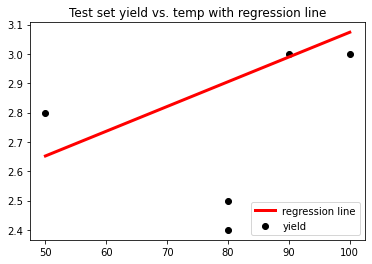

In [13]:
#Plot the actual yield (y_train) vs temp. values  for the test set
plt.scatter(X_test, y_test,  color='black', label = "yield")

# Plot the regression line
x = np.linspace(50, 100,15) # Generate 15 points to plot our regression line
x = x.reshape(-1,1) # reshape data for our regression
y = regressor.predict(x) # feed x's into regressor
plt.plot(x, y, color='red', linewidth=3, label = "regression line") # plot the regression line

plt.legend(loc='lower right')
plt.title('Test set yield vs. temp with regression line')
plt.show()

### b) Inspecting linear regression model (5 points)

After inspecting the results visually, does this model appear to be a good or bad fit on the test set and training set? 

It appears to be a bad fit.

Does the model display signs of underfitting? If so why?

Yes. Because from the graph it display a high bias.

### c) Polynomial Regression (10 points)

Data may not follow a linear relationship from the independent variable $X$ to the dependent variable $y$. Fitting a linear model to this would be inaccurate and yield a high loss. 

If we want to model an order $d$ polynomial relationship between $X$ and $y$ we can augment our initial linear model where instead of having:
$$
y_i = \theta_0 + \theta_1 x_i
$$

We have:

$$
y_i = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 + \cdots + \theta_d x_i^d
$$

We can use the same linear regression algorithm we if we first augment $X$ and add extra columns (or dimensions). 

$$ \textbf X =
\begin{bmatrix}
    x_{1}       & x_{1}^2 & \cdots & x_{1}^d \\
    x_{2}       & x_{2}^2 & \cdots & x_{2}^d \\
    \vdots       & \vdots & \ddots & \vdots \\
    x_{n}       & x_{n}^2 & \cdots & x_{n}^d
\end{bmatrix}$$

Then our new higher order $\hat y$ is computed same as before.

$$ \hat y =  X \theta =
\begin{bmatrix}
    1 & x_{1}       & x_{1}^2 & \cdots & x_{1}^d \\
    1 & x_{2}       & x_{2}^2 & \cdots & x_{2}^d \\
    \vdots & \vdots       & \vdots & \ddots & \vdots \\
    1 & x_{n}       & x_{n}^2 & \cdots & x_{n}^d
\end{bmatrix}
\begin{bmatrix}\theta_0 \\ \theta_1 \\ \vdots \\ \theta_{d} 
\end{bmatrix}=
\begin{bmatrix}
    \theta_0 + \theta_1 x_{1} + \theta_2 x_{1}^2 + \cdots + \theta_{d}  x_{1}^d \\
    \theta_0 + \theta_1 x_{2} + \theta_2 x_{2}^2 + \cdots + \theta_{d}  x_{2}^d  \\
    \vdots   \\
    \theta_0 + \theta_1 x_{n} + \theta_2 x_{n}^2 + \cdots + \theta_{d}  x_{n}^d
\end{bmatrix} 
= \begin{bmatrix}\hat y_1 \\ \hat y_2 \\ \vdots \\ \hat y_{n} 
\end{bmatrix}$$

Using sklearn's **PolynomialFeatures** functionality, we will now transform X_train and X_test into second order polynomial space.

For more info: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [14]:
# First, lets look at the values of X_train
print(X_train)

[[ 70]
 [ 50]
 [100]
 [ 90]
 [ 80]
 [ 90]
 [ 70]
 [ 50]
 [ 70]
 [100]]


In [15]:
from sklearn.preprocessing import PolynomialFeatures

#Create polynomial transform of degree 2
poly = PolynomialFeatures(2)

# Transform X_train X_test
X_train_pol = poly.fit_transform(X_train)
X_test_pol = poly.fit_transform(X_test)

# Print X_train_pol
print(X_train_pol)

[[1.0e+00 7.0e+01 4.9e+03]
 [1.0e+00 5.0e+01 2.5e+03]
 [1.0e+00 1.0e+02 1.0e+04]
 [1.0e+00 9.0e+01 8.1e+03]
 [1.0e+00 8.0e+01 6.4e+03]
 [1.0e+00 9.0e+01 8.1e+03]
 [1.0e+00 7.0e+01 4.9e+03]
 [1.0e+00 5.0e+01 2.5e+03]
 [1.0e+00 7.0e+01 4.9e+03]
 [1.0e+00 1.0e+02 1.0e+04]]


We can now fit a second degree polynomial regression model to the transformed data.

In [16]:
from sklearn.linear_model import LinearRegression
# instantiate LinearRegression
regressor = LinearRegression()### YOUR CODE HERE ### 

# Fit the regressor using X_train_pol and y_train
### YOUR CODE HERE ###
regressor.fit(X_train_pol, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now, visually inspect the polynomial regression model and see how well this model predicts the yield on the training set. yield vs. temp. points are plotted in black along with the polynomial regression line in red.

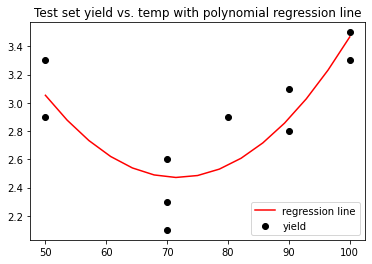

In [17]:
#Plot the actual yield (y_train) vs temp. values from training set
plt.scatter(X_train, y_train,  color='black', label = "yield")

# Plot the regression line
x = np.linspace(50, 100,15) # Generate 15 points to plot our regression line
x = x.reshape(-1,1) # reshape for our regression
y = regressor.predict(poly.fit_transform(x)) # feed transformed x's into regressor
plt.plot(x, y, color='red', label = "regression line") # plot regression line

plt.legend(loc='lower right')
plt.title('Test set yield vs. temp with polynomial regression line')
plt.show()

Lastly, lets plot the test set yield vs. temp. points along with the polynomial regression line.

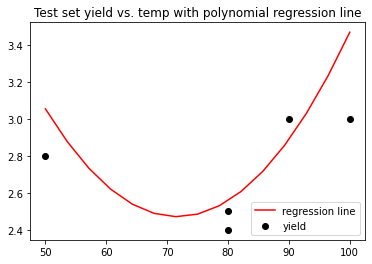

In [18]:
#Plot the actual yield (y_train) vs temp. values from training set
plt.scatter(X_test, y_test,  color='black', label = "yield")

# Plot the regression line
x = np.linspace(50, 100,15) # Generate 15 points to plot our regression line
x = x.reshape(-1,1) # reshape for our regression
y = regressor.predict(poly.fit_transform(x)) # feed transformed x's into regressor
plt.plot(x, y, color='red', label = "regression line") # plot regression line

plt.legend(loc='lower right')
plt.title('Test set yield vs. temp with polynomial regression line')
plt.show()

### d) Inpsecting polynomial regression model (5 points)

After inspecting the polynomial regression model, does the model appear to be a better fit than simple linear regression? 

Yes

Does the model address display more or less underfitting than the simple linear regression model and why?

The model displays less underfitting than linear regression because comparing to linear regression, the bias is way smaller.

## Problem 2 - Fish Dataset

## Importing the dataset

We will now perform different variations of linear regression to predict fish weight given Species, weight, and physical measurements. The different attributes of the data are:

- Species: species name of fish

- Weight: weight of fish in Gram g

- Length1: vertical length in cm

- Length2: diagonal length in cm

- Length3: cross length in cm

- Height: height in cm

- Width: diagonal width in cm

Begin by downloading the Fish.csv file from google drive. Make sure to select your @ucsc.edu email when authorizing access to your account. 

In [19]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [20]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [21]:
# Download the Fish data
downloaded = drive.CreateFile({'id':"1AtMi-xCejVlhYS5qjgjjW4gH-TLuWJjC"})
downloaded.GetContentFile('Fish.csv')  

In [22]:
# Create pandas dataframe
fish_data = pd.read_csv('Fish.csv')

Let's look at some of the data and check some of the dataset descriptors.

In [23]:
# Let's print out the first few rows
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [24]:
# Let's get the data shape
fish_data.shape

(159, 7)

In [25]:
# Let's describe the data
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [26]:
# Lastly, let's get data info
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


### a) Removing 0's from data (5 points)

We can see that there aren't any null values in this dataset by using the .info() function. However, .describe() shows us there are weights of 0.0g which is ambiguous and is likely a recording error. 

Drop any row that has a weight of 0.0.

In [27]:
# Delete any rows for which there is a measurement of 0.0.
### YOUR CODE HERE ##
fish_data = fish_data.drop(fish_data[fish_data.Weight == 0].index)

# Let's take another look.
fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### b) Outlier Detection \& Elimination (5 points)

Using 4 deviations from the mean as our cutoff, and using the data listed using the describe function above, are there any outliers?

In [28]:
for col in fish_data:
    if fish_data[col].dtype != object:
        fish_data['Z-tran'] = (fish_data[col] - fish_data[col].mean()) / fish_data[col].std(ddof=0)
        fish_data = fish_data.drop(fish_data[(fish_data['Z-tran'] > 4)].index)
        fish_data = fish_data.drop(fish_data[(fish_data['Z-tran'] < -4)].index)
        fish_data = fish_data.drop(columns=['Z-tran'])

fish_data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


No, there is no value with over 4 or below -4 deviations from mean.

## Problem 3 - Fish Linear Regression

You will now run different versions of linear regression in order to predict fish Weight using the 6 explanatory variables.

### a) Multiple Linear Regression (6 points)

First, run a multiple linear regression using only the height, width, and length measurements to predict weight. We will begin by splitting the data into features **X_fish** and target variable **y_fish**.

In [29]:
y_fish = fish_data.iloc[:, 1] # Get Fish Weights
X_fish = fish_data.drop(columns=['Weight']) # Get Fish measurements plus species
X_fish = X_fish.drop(columns=['Species']) # Drop the Fish Species for now

# print X.head(), you should have 5 features for each sample
print("X_fish.head():")
print(X_fish.head())

# print y.head(), you should have one label for each sample
print("\ny_fish.head()")
print(y_fish.head())

X_fish.head():
   Length1  Length2  Length3   Height   Width
0     23.2     25.4     30.0  11.5200  4.0200
1     24.0     26.3     31.2  12.4800  4.3056
2     23.9     26.5     31.1  12.3778  4.6961
3     26.3     29.0     33.5  12.7300  4.4555
4     26.5     29.0     34.0  12.4440  5.1340

y_fish.head()
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


Now, we are almost ready to run regression with scikit-learn. We need to first convert **X_fish** and **y_fish** into numpy arrays and split the data into training and validation splits using sklearn **train_test_split**. 

sklearn's train_test_split offers customizable functionality when creating training and test sets. For more information, checkout https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html .

In [30]:
# Convert X, and y into np arrays
X_fish = X_fish.values
y_fish = y_fish.values

# Split data into train test split
from sklearn.model_selection import train_test_split
X_fish_train, X_fish_test, y_fish_train, y_fish_test = train_test_split(X_fish, y_fish, test_size = 0.2, random_state = 0)

Now we are ready to run a multiple linear regression. Use sklearn's **LinearRegression** to carry out the regression.

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()### YOUR CODE HERE ### 

# Fit the regressor using X_fish_train and y_fish_train
### YOUR CODE HERE ###
regressor.fit(X_fish_train, y_fish_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now let's see how we did, generate predictions using X_fish_test.

In [32]:
# generate predictions using X_fish_test
y_fish_pred = regressor.predict(X_fish_test)### YOUR CODE HERE ### 

# Print the predictions along with actual weights
np.set_printoptions(precision=2)
print(np.concatenate((y_fish_pred.reshape(len(y_fish_pred),1), y_fish_test.reshape(len(y_fish_test),1)),1))

[[ 476.59  390.  ]
 [ 207.99  160.  ]
 [ 696.61  700.  ]
 [ 829.84 1015.  ]
 [ 155.66  120.  ]
 [ 839.43 1100.  ]
 [ 756.42  820.  ]
 [ 860.91  950.  ]
 [ 648.07  556.  ]
 [ 194.37  145.  ]
 [ 656.33  700.  ]
 [ 988.35 1600.  ]
 [ 694.42  720.  ]
 [  27.97   55.  ]
 [  90.4    85.  ]
 [ 279.88  188.  ]
 [ 426.52  300.  ]
 [ 253.27  180.  ]
 [ 988.35 1550.  ]
 [ 380.41  306.  ]
 [ 203.77  140.  ]
 [ 873.13  975.  ]
 [ 776.43 1000.  ]
 [ 514.65  450.  ]
 [ 156.25  110.  ]
 [  98.82   78.  ]
 [ 423.34  300.  ]
 [ 638.76  650.  ]
 [-203.31    6.7 ]
 [ 611.88  514.  ]
 [ 352.88  290.  ]
 [ 307.76  270.  ]]


### b) Computing MSE and R-squared for MLR (5 points)

The model appears to do an okay job predicting some weights while missing the mark on others. Let's quantify the results by computing mean squared error (MSE) and the coefficient of determination (R-squared). sklearn's metrics package provides functions to compute the values for you. 

More info can be found here: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Compute the mean squared error using y_fish_test and y_fish_pred
### YOUR CODE HERE ###
print("MSE:", mean_squared_error(y_fish_test, y_fish_pred))

# Compute the coefficient of determination using y_fish_test and y_fish_pred
### YOUR CODE HERE ###
print("R-squared:", r2_score(y_fish_test, y_fish_pred))


MSE: 31561.773067541344
R-squared: 0.8245122776931352


Using the y_fish_test and y_fish_pred, what was the mean squared error for this model?

31561.773067541344

Using the y_fish_test and y_fish_pred, what was the coefficient of detemination for this model?

0.8245122776931352

### c) Polynomial Multiple Linear Regression (12 points)

We have seen how polynomial regression can increase the predictive power of linear regression models. We will now run a polynomial multiple linear regression model in order to gain a more accurate model. Begin by transforming the features X_fish_test and X_fish_train into second order polynomial space. There will be interaction terms in the transformed dataset as well. For more on interaction terms visit the sklearn docs.

In [39]:
from sklearn.preprocessing import PolynomialFeatures
#Create polynomial transform of degree 2. hint: problem 1
poly = PolynomialFeatures(2)### YOUR CODE HERE ###

# Transform X_fish_train X_fish_test to second order polynomial space
X_fish_train_pol = poly.fit_transform(X_fish_train)### YOUR CODE HERE ###
X_fish_test_pol = poly.fit_transform(X_fish_test)### YOUR CODE HERE ###

# Print 5 rows of X_fish_train_poly, shape should be (5,21)
print(X_fish_train_pol[0:5,:])

[[1.00e+00 3.04e+01 3.30e+01 3.83e+01 1.49e+01 5.29e+00 9.24e+02 1.00e+03
  1.16e+03 4.52e+02 1.61e+02 1.09e+03 1.26e+03 4.90e+02 1.74e+02 1.47e+03
  5.69e+02 2.02e+02 2.21e+02 7.85e+01 2.79e+01]
 [1.00e+00 3.48e+01 3.73e+01 3.98e+01 6.29e+00 4.02e+00 1.21e+03 1.30e+03
  1.39e+03 2.19e+02 1.40e+02 1.39e+03 1.48e+03 2.35e+02 1.50e+02 1.58e+03
  2.50e+02 1.60e+02 3.95e+01 2.53e+01 1.62e+01]
 [1.00e+00 4.00e+01 4.25e+01 4.55e+01 6.83e+00 4.46e+00 1.60e+03 1.70e+03
  1.82e+03 2.73e+02 1.78e+02 1.81e+03 1.93e+03 2.90e+02 1.90e+02 2.07e+03
  3.11e+02 2.03e+02 4.66e+01 3.04e+01 1.99e+01]
 [1.00e+00 3.15e+01 3.45e+01 3.97e+01 1.55e+01 5.28e+00 9.92e+02 1.09e+03
  1.25e+03 4.89e+02 1.66e+02 1.19e+03 1.37e+03 5.36e+02 1.82e+02 1.58e+03
  6.16e+02 2.10e+02 2.41e+02 8.20e+01 2.79e+01]
 [1.00e+00 2.10e+01 2.30e+01 2.45e+01 5.22e+00 3.63e+00 4.41e+02 4.83e+02
  5.14e+02 1.10e+02 7.61e+01 5.29e+02 5.64e+02 1.20e+02 8.34e+01 6.00e+02
  1.28e+02 8.88e+01 2.72e+01 1.89e+01 1.31e+01]]


Next run the second order polynomial regression using the transformed data. Instantiate a new regression model and use X_fish_train_pol and y_fish_train to fit the model.

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()### YOUR CODE HERE ### 

# Fit the regressor using X_fish_train_pol and y_fish_train
### YOUR CODE HERE ###
regressor.fit(X_fish_train_pol, y_fish_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now let's see how we did with the second model, generate predictions using X_fish_test_pol.

In [41]:
# generate predictions using X_test
y_fish_pol_pred = regressor.predict(X_fish_test_pol)### YOUR CODE HERE ### 

# Print the predictions along with actual weights
np.set_printoptions(precision=2)
print(np.concatenate((y_fish_pred.reshape(len(y_fish_pol_pred),1), y_fish_test.reshape(len(y_fish_test),1)),1))

[[ 476.59  390.  ]
 [ 207.99  160.  ]
 [ 696.61  700.  ]
 [ 829.84 1015.  ]
 [ 155.66  120.  ]
 [ 839.43 1100.  ]
 [ 756.42  820.  ]
 [ 860.91  950.  ]
 [ 648.07  556.  ]
 [ 194.37  145.  ]
 [ 656.33  700.  ]
 [ 988.35 1600.  ]
 [ 694.42  720.  ]
 [  27.97   55.  ]
 [  90.4    85.  ]
 [ 279.88  188.  ]
 [ 426.52  300.  ]
 [ 253.27  180.  ]
 [ 988.35 1550.  ]
 [ 380.41  306.  ]
 [ 203.77  140.  ]
 [ 873.13  975.  ]
 [ 776.43 1000.  ]
 [ 514.65  450.  ]
 [ 156.25  110.  ]
 [  98.82   78.  ]
 [ 423.34  300.  ]
 [ 638.76  650.  ]
 [-203.31    6.7 ]
 [ 611.88  514.  ]
 [ 352.88  290.  ]
 [ 307.76  270.  ]]


### d) Computing MSE and R-squared for Polynomial Regression (5 points)

Now, compute the mean squared error using y_fish_test and y_fish_pol_pred

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Compute the mean squared error using y_fish_test and y_fish_pol_pred
### YOUR CODE HERE ###
print("MSE:", mean_squared_error(y_fish_test, y_fish_pol_pred))

# Compute the coefficient of determination using y_fish_test and y_fish_pol_pred
### YOUR CODE HERE ###
print("R-squared:", r2_score(y_fish_test, y_fish_pred))

MSE: 12552.64579521197
R-squared: 0.8245122776931352


Using the y_fish_test and y_fish_pol_pred, what was the mean squared error for this model?

12552.64579521197

Using the y_fish_test and y_fish_pol_pred, what was the coefficient of detemination for this model?

0.8245122776931352

### e) Multiple Linear Regression With Categorical Variable (12 points)

Now that we have done multiple linear regression, and polynomial multiple linear regression, we will now do a multiple linear regression that takes into account the species of fish by creating numeric levels.

In [43]:
# Create a copy of fish_data
fish_data_species = fish_data

# Begin by generating a dictionary that maps all unique species in fish_data to a unique id 
level_dict = {fish_species:i for i, fish_species in enumerate(fish_data_species['Species'].unique())}### YOUR CODE HERE ###

# Uses the level dictionary to retrieve the id
def integer_encode_level(level):
    ### YOUR CODE HERE ###
    return level_dict[level]

# Apply the function to the Species column and store in Species column (you should overwrite the species current data with the numeric representations)
fish_data_species['Species'] = fish_data_species['Species'].apply(integer_encode_level)### YOUR CODE HERE ###

# Check data
fish_data_species

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,6,12.2,11.5,12.2,13.4,2.0904,1.3936
155,6,13.4,11.7,12.4,13.5,2.4300,1.2690
156,6,12.2,12.1,13.0,13.8,2.2770,1.2558
157,6,19.7,13.2,14.3,15.2,2.8728,2.0672


We will now create a dataset with 1 target column and 6 feature columns: Species, Length1, Length2, Length3, Height, Width. 

In [44]:
# Split fish_data into 
y_fish_categorical = fish_data_species.iloc[:, 1] # Get Fish Weights
X_fish_categorical = fish_data_species.drop(columns=['Weight']) # Get Fish measurements plus species

# print X_fish_categorical.head(), you should have 6 features for each sample
print("X_fish_categorical.head():")
print(X_fish_categorical.head())

# print y_fish_categorical.head(), you should have one label for each sample
print("\ny_fish_categorical.head()")
print(y_fish_categorical.head())

X_fish_categorical.head():
   Species  Length1  Length2  Length3   Height   Width
0        0     23.2     25.4     30.0  11.5200  4.0200
1        0     24.0     26.3     31.2  12.4800  4.3056
2        0     23.9     26.5     31.1  12.3778  4.6961
3        0     26.3     29.0     33.5  12.7300  4.4555
4        0     26.5     29.0     34.0  12.4440  5.1340

y_fish_categorical.head()
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


Create training and test sets for the fish data with categorical species variable:

In [45]:
# Convert X, and y into np arrays
X_fish_categorical = X_fish_categorical.values
y_fish_categorical = y_fish_categorical.values

# Split data into train test split
from sklearn.model_selection import train_test_split
X_fish_train_categorical, X_fish_test_categorical, y_fish_train_categorical, y_fish_test_categorical = train_test_split(X_fish_categorical, y_fish_categorical, test_size = 0.2, random_state = 0)

Now we are ready to run a our final multiple linear regression. As a recap, we added a categorical variable to represent the species of fish. We encoded the species as levels, and overwrote the species column with the numeric representations of the species. Now, use sklearn's **LinearRegression** to carry out regression one last time.

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()### YOUR CODE HERE ### 

# Fit the regressor using X_fish_train_categorical and y_fish_train_categorical
### YOUR CODE HERE ###
regressor.fit(X_fish_train_categorical, y_fish_train_categorical)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Let's check the predictions for this model. Generate predictions using X_fish_test_categorical and compare to the test set weights.

In [47]:
# generate predictions using X_fish_test_categorical
y_fish_pred_categorical = regressor.predict(X_fish_test_categorical)### YOUR CODE HERE ### 


# Print the predictions along with actual weights
np.set_printoptions(precision=2)
print(np.concatenate((y_fish_pred.reshape(len(y_fish_pred_categorical),1), y_fish_test.reshape(len(y_fish_test_categorical),1)),1))

[[ 476.59  390.  ]
 [ 207.99  160.  ]
 [ 696.61  700.  ]
 [ 829.84 1015.  ]
 [ 155.66  120.  ]
 [ 839.43 1100.  ]
 [ 756.42  820.  ]
 [ 860.91  950.  ]
 [ 648.07  556.  ]
 [ 194.37  145.  ]
 [ 656.33  700.  ]
 [ 988.35 1600.  ]
 [ 694.42  720.  ]
 [  27.97   55.  ]
 [  90.4    85.  ]
 [ 279.88  188.  ]
 [ 426.52  300.  ]
 [ 253.27  180.  ]
 [ 988.35 1550.  ]
 [ 380.41  306.  ]
 [ 203.77  140.  ]
 [ 873.13  975.  ]
 [ 776.43 1000.  ]
 [ 514.65  450.  ]
 [ 156.25  110.  ]
 [  98.82   78.  ]
 [ 423.34  300.  ]
 [ 638.76  650.  ]
 [-203.31    6.7 ]
 [ 611.88  514.  ]
 [ 352.88  290.  ]
 [ 307.76  270.  ]]


### f) Computing MSE and R-squared for MLR with Categorical Variable (5 points)

In [48]:
# Compute the mean squared error using y_fish_test_categorical and y_fish_pred_categorical
### YOUR CODE HERE ###
print("MSE:", mean_squared_error(y_fish_test_categorical, y_fish_pred_categorical))

# Compute the coefficient of determination using y_fish_test_categorical and y_fish_pred_categorical
### YOUR CODE HERE ###
print("R-squared:", r2_score(y_fish_test_categorical, y_fish_pred_categorical))

MSE: 34678.46536821308
R-squared: 0.807183047430761


Using y_fish_test_categorical and y_fish_pred_categorical, what was the mean squared error for this model?

34678.46536821308

Using y_fish_test_categorical and y_fish_pred_categorical, what was the coefficient of detemination for this model?

0.807183047430761

### g) Model selection (15 points)

MSE and the coefficient of determination (R-squared) are used to provide quick statistics on how a model performs. In general a lower MSE means that the labels $y$ are close to the regression line. R-squared is always between 0 and 100%. In general, the higher the R-squared, the better the model fits your data. Based upon the MSE and  R-squared values you computed in parts a,b, and c which model fits the data the best? Also, do the numeric predictions generated by your models reflect your hypothesis?

Among all three models, polynomial regression fits the data the best with MSE of 12553 and 82.54% of R-squared value. From observing the output from part c), the predictions are pretty close to hypothesis. 